## Introduction

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The project aimes to build some relations and visualizations about the dataset. 

### Introducing libraries and dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### Functions section 

In [4]:
def percentage_blocks(df, var):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df[var].value_counts() / df.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

In [5]:
def filt(df,state):
    return df.groupby(['EmploymentStatus','t_date']).agg(amount=('LoanOriginalAmount', sum)).reset_index('EmploymentStatus').query('EmploymentStatus == "{}"'.format(state))['amount']

In [6]:
def filt2(df,state):
    return df.groupby(['EmploymentStatus','t_date']).agg(amount=('MonthlyLoanPayment', sum)).reset_index('EmploymentStatus').query('EmploymentStatus == "{}"'.format(state))['amount']

### Univariate plots 

#### What is the frequent loan periods offered by the bank ?

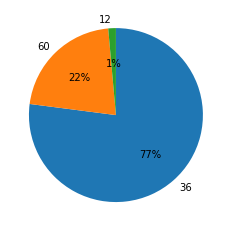

In [8]:
sorted_counts = df['Term'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%.0f%%');

The analysis shows the bank is most likely to give loans at 36 month periods. The bank is expecting that for most of the loans will payoff with period of 36 months.

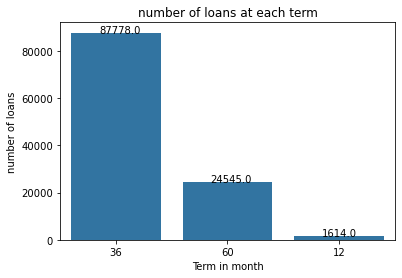

In [11]:
base_color = sb.color_palette()[0]
type_order = sorted_counts.index
ax = sb.countplot(data=df, x='Term', color=base_color, order=type_order);
plt.xlabel('Term in month') 
plt.ylabel('number of loans') 
plt.title('number of loans at each term')
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.05))

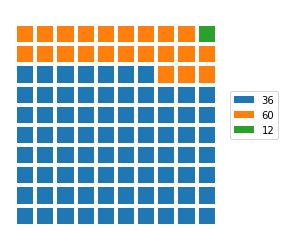

In [8]:
waffle_counts = percentage_blocks(df, 'Term')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts.values[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts.values[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');

#### Describe the loan status of the borrowers ?

In [9]:
df.LoanStatus.isnull().sum()

0

In [10]:
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

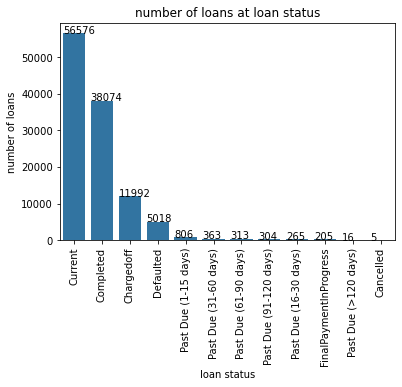

In [12]:
sorted_counts = df['LoanStatus'].value_counts()
base_color = sb.color_palette()[0]
type_order = sorted_counts.index
ax = sb.countplot(data=df, x='LoanStatus', color=base_color, order=type_order);
plt.xlabel('loan status') 
plt.ylabel('number of loans') 
plt.title('number of loans at loan status')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))

the loan status showing that the bank have current loan status more than others. the bank is not likely to cancel the loans. Most loans states are current and completed.

#### Give insights about borroweres status

In [12]:
df.BorrowerState.unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', nan, 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'], dtype=object)

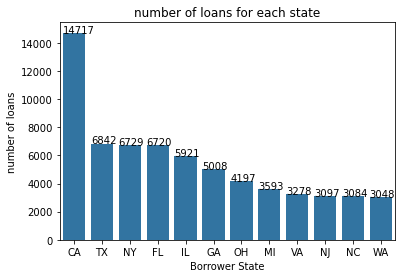

In [13]:
# Bar plots of Borrowers Top 12 states
sorted_counts = df['BorrowerState'].value_counts()[:12]
base_color = sb.color_palette()[0]
type_order = sorted_counts.index
ax = sb.countplot(data=df, x='BorrowerState', color=base_color, order=type_order);
plt.xlabel('Borrower State') 
plt.ylabel('number of loans') 
plt.title("number of loans for each state")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))

The most states having loans were CA, TX , NY, FL and others. it is noted that the loans in CA is much more than the second bigger states with at least twice the value of the second state.

In [14]:
top_states = df['BorrowerState'].value_counts()[:10]
top_states['Others'] = df['BorrowerState'].value_counts()[10:].sum()

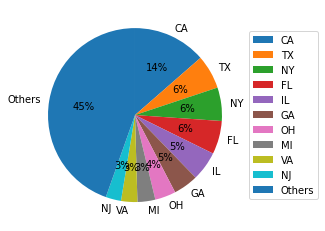

In [15]:
plt.pie(top_states, labels = top_states.index, startangle = 90, counterclock = False, autopct='%.0f%%');
plt.legend(top_states.index, bbox_to_anchor = (1, 0.5), loc = 6);

#### Give insights about the Employment status 

In [16]:
df.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

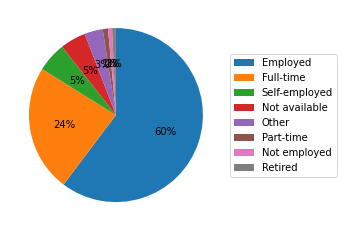

In [17]:
sorted_counts = df['EmploymentStatus'].value_counts()
plt.pie(sorted_counts, startangle = 90, counterclock = False, autopct='%.0f%%');
plt.legend(sorted_counts.index, bbox_to_anchor = (1, 0.5), loc = 6);

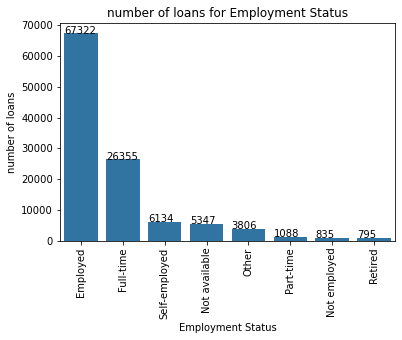

In [14]:
sorted_counts = df['EmploymentStatus'].value_counts()
base_color = sb.color_palette()[0]
type_order = sorted_counts.index
ax = sb.countplot(data=df, x='EmploymentStatus', color=base_color, order=type_order);
plt.xlabel('Employment Status') 
plt.ylabel('number of loans') 
plt.title("number of loans for Employment Status")
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))

the Employees and full timers are the most section of the loans owners. Emoloyees have more loans than the second employment status at value of 2.5.

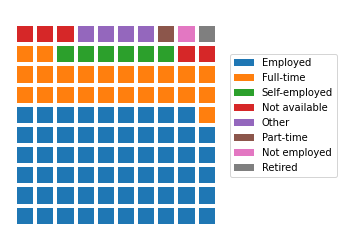

In [19]:
waffle_counts = percentage_blocks(df, 'EmploymentStatus')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts.values[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts.values[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');

#### Give insights about borrowers whether they have homes or not

In [20]:
df.IsBorrowerHomeowner.unique()

array([ True, False])

In [21]:
df.IsBorrowerHomeowner.isnull().sum()

0

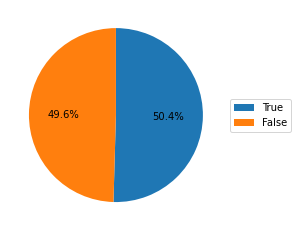

In [22]:
sorted_counts = df['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_counts, startangle = 90, counterclock = False, autopct='%.001f%%');
plt.legend(sorted_counts.index, bbox_to_anchor = (1, 0.5), loc = 6);

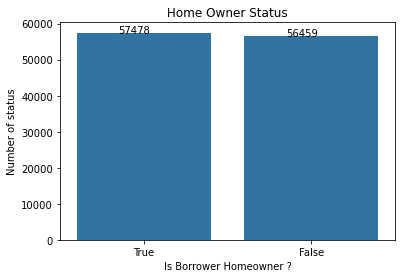

In [15]:
sorted_counts = df['IsBorrowerHomeowner'].value_counts()
base_color = sb.color_palette()[0]
type_order = sorted_counts.index
ax = sb.countplot(data=df, x='IsBorrowerHomeowner', color=base_color, order=type_order);
plt.xlabel('Is Borrower Homeowner ?') 
plt.ylabel('Number of status') 
plt.title(" Home Owner Status ")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()))

home owners having loans are slightly more than those who don't. This introduces the hypothesis that people are having the loans to have their own homes at the percentage of 50%. 

#### Give insights about borrowers income ranges

In [24]:
df.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

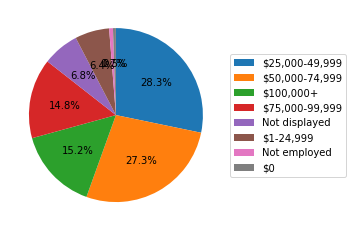

In [25]:
sorted_counts = df['IncomeRange'].value_counts()
plt.pie(sorted_counts, startangle = 90, counterclock = False, autopct='%.001f%%');
plt.legend(sorted_counts.index, bbox_to_anchor = (1, 0.5), loc = 6);

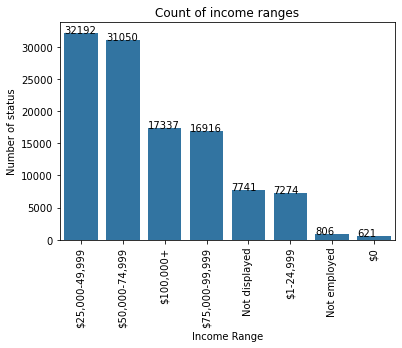

In [16]:
sorted_counts = df['IncomeRange'].value_counts()
base_color = sb.color_palette()[0]
type_order = sorted_counts.index
ax = sb.countplot(data=df, x='IncomeRange', color=base_color, order=type_order);
plt.xticks(rotation=90)
plt.xlabel('Income Range') 
plt.ylabel('Number of status') 
plt.title("Count of income ranges")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()))

The people with income range of 25,000-49,999 dollars and 50,000-74,999 dollars are sectors who highly need loans.

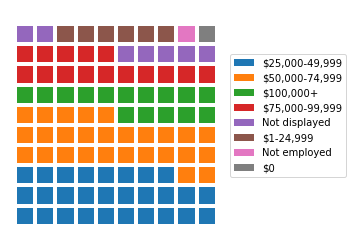

In [27]:
waffle_counts = percentage_blocks(df, 'IncomeRange')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts.values[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts.values[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');

#### Give insights about borrowers income verification

In [28]:
df.IncomeVerifiable.unique()

array([ True, False])

In [29]:
df.IncomeVerifiable.isnull().sum()

0

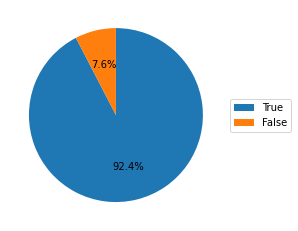

In [30]:
sorted_counts = df['IncomeVerifiable'].value_counts()
plt.pie(sorted_counts, startangle = 90, counterclock = False, autopct='%.001f%%');
plt.legend(sorted_counts.index, bbox_to_anchor = (1, 0.5), loc = 6);

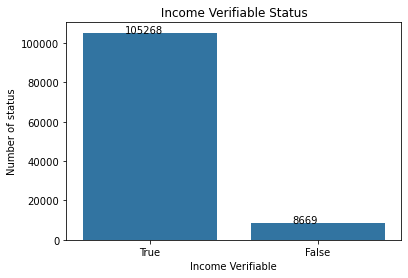

In [17]:
sorted_counts = df['IncomeVerifiable'].value_counts()
base_color = sb.color_palette()[0]
type_order = sorted_counts.index
ax = sb.countplot(data=df, x='IncomeVerifiable', color=base_color, order=type_order);
plt.xlabel('Income Verifiable') 
plt.ylabel('Number of status') 
plt.title(" Income Verifiable Status ")
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()))

The banks is more likely to verify the income at 92.4%.

### Bivariate plots

#### Give insights about the relation between the Employment status and if the borrower is home owner or not

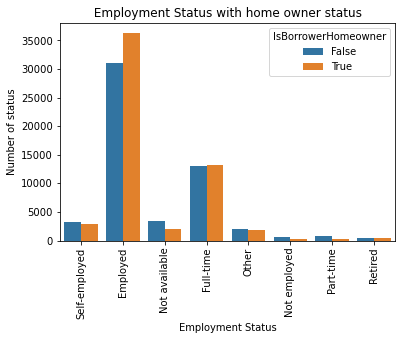

In [18]:
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner')
plt.xticks(rotation=90);
plt.xlabel('Employment Status') 
plt.ylabel('Number of status') 
plt.title(" Employment Status with home owner status ");

the employees are more likely to have homes while others like part timers and Not employed people a are more likely not to have homes.

#### Give insights about the relation between the Income Range and if the borrower is home owner or not

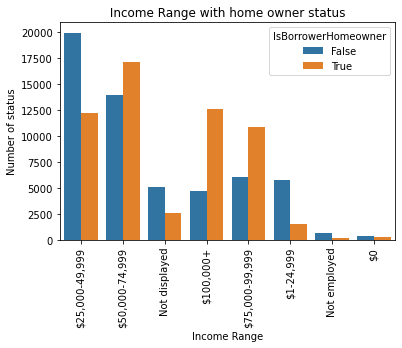

In [19]:
sb.countplot(data = df, x = 'IncomeRange', hue = 'IsBorrowerHomeowner')
plt.xticks(rotation=90);
plt.xlabel('Income Range') 
plt.ylabel('Number of status') 
plt.title(" Income Range with home owner status ");

for 25,000-49,999 dollars are not likely to have homes while others like 100,000+ dollars are more likely to have homes.

#### Give insights about the available Bank card credit and the emplyment status 

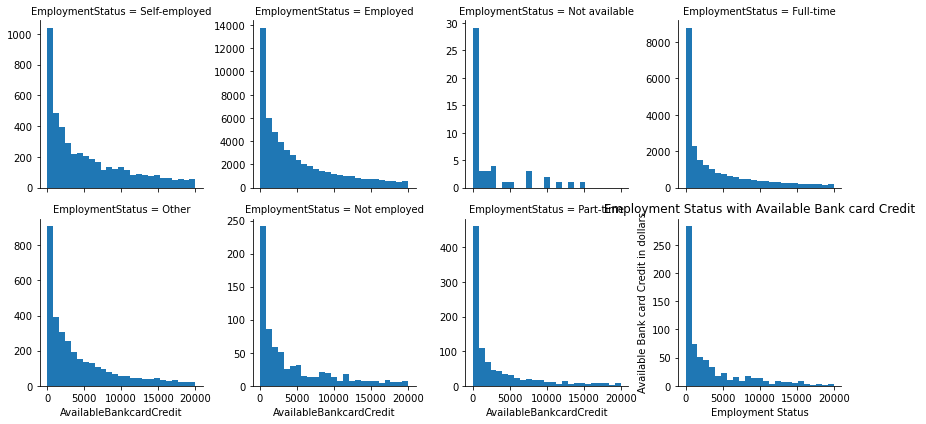

In [21]:
bin_edges = np.arange(0, 20000+800, 800)
g = sb.FacetGrid(data = df, col = 'EmploymentStatus',col_wrap=4, sharey=False)
g.map(plt.hist, "AvailableBankcardCredit", bins = bin_edges);

The Employees and full timers are have the greatest available Bank card credit.

#### Give insights about the stated monthly income and the emplyment status 

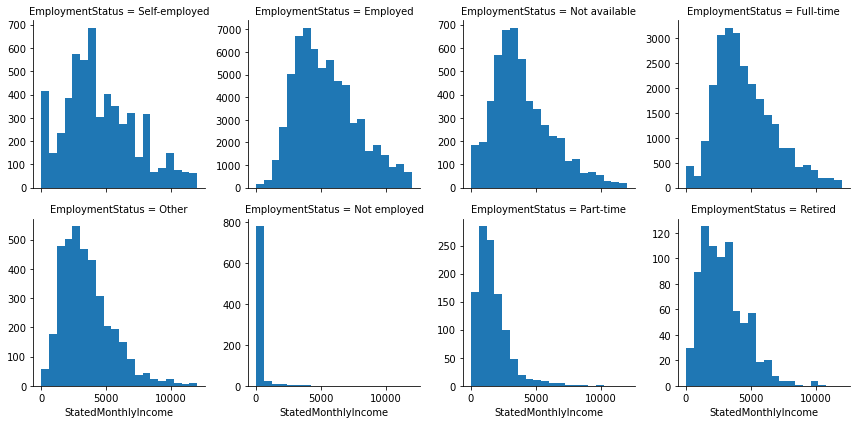

In [35]:
bin_edges = np.arange(0, 12000+600, 600)
g = sb.FacetGrid(data = df, col = 'EmploymentStatus',col_wrap=4, sharey=False)
g.map(plt.hist, "StatedMonthlyIncome", bins = bin_edges);

#### Give insights about the loan originaion amount and the emplyment status 


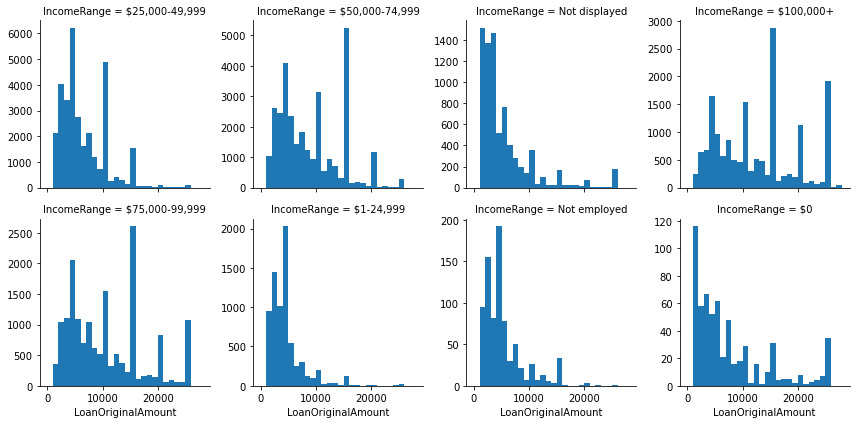

In [36]:
bin_edges = np.arange(0, 28000+1000, 1000)
g = sb.FacetGrid(data = df, col = 'IncomeRange',col_wrap=4, sharey=False)
g.map(plt.hist, "LoanOriginalAmount", bins = bin_edges);

the loans amount is greater for the income range of 25,000-49,999 dollars.

#### Show the cash out and in due to loans with time

In [23]:
df['LoanOriginationDate'] = df.LoanOriginationDate.str[:10] #avoid time in date
df['t_date'] = pd.to_datetime(df.LoanOriginationDate) #convert to date format
df['t_date'] = df.t_date + pd.offsets.MonthBegin(-1) #send dates to first day of the month

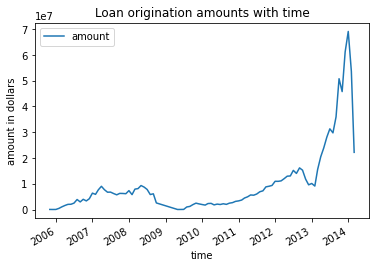

In [24]:
fig, ax = plt.subplots(1,1)
amount = df.groupby(['t_date']).agg(amount=('LoanOriginalAmount', sum))
amount.plot(ax=ax);
plt.title('Loan origination amounts with time')
plt.ylabel('amount in dollars')
plt.xlabel('time')
plt.show();

the loan cash going out from the bank with time showing a great increase in the demand of loans at 2013 then decreased after 2014. similar behaviour are seen in the monthly income amount to the bank.

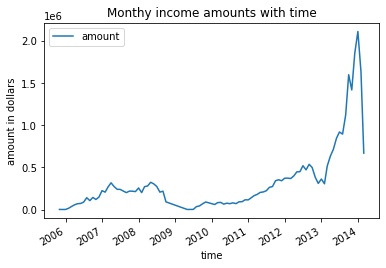

In [25]:
fig, ax = plt.subplots(1,1)
income = df.groupby(['t_date']).agg(amount=('MonthlyLoanPayment', sum))
income.plot(ax=ax);
plt.title('Monthy income amounts with time')
plt.ylabel('amount in dollars')
plt.xlabel('time')
plt.show();

### Multivariate plots

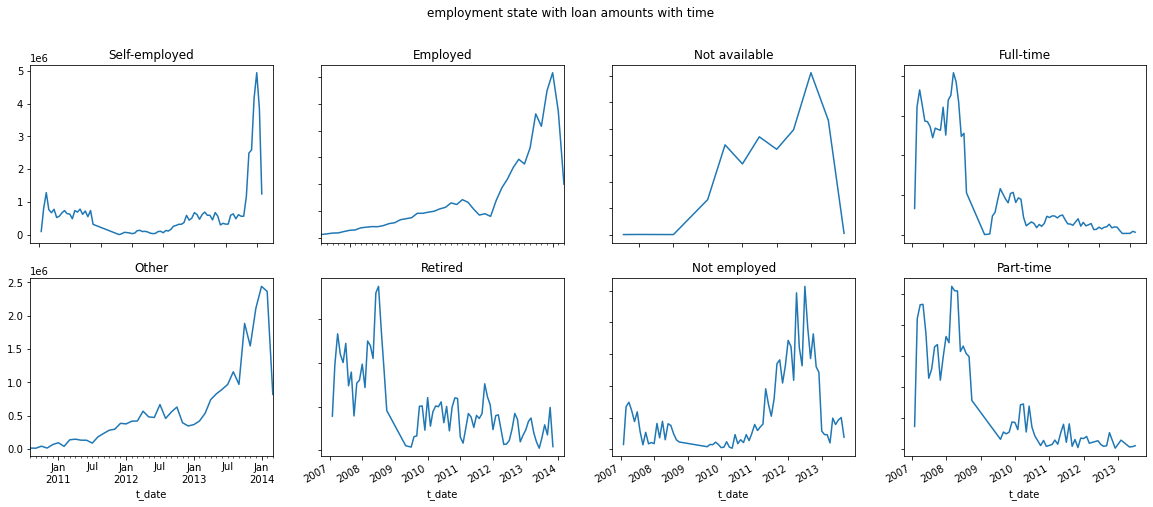

In [40]:
stat = df.EmploymentStatus.unique()
fig, ((ax1, ax2, ax3, ax4),(ax5, ax6,ax7, ax8))= plt.subplots(2, 4 , figsize=(20,8))
fig.suptitle('employment state with loan amounts with time')
filt(df,stat[0]).plot(ax=ax1);
ax1.set_title(stat[0])
filt(df,stat[1]).plot(ax=ax2);
ax2.set_title(stat[1])
filt(df,stat[2]).plot(ax=ax3);
ax3.set_title(stat[2])
filt(df,stat[3]).plot(ax=ax4);
ax4.set_title(stat[3])
filt(df,stat[4]).plot(ax=ax5);
ax5.set_title(stat[4])
filt(df,stat[8]).plot(ax=ax6);
ax6.set_title(stat[8])
filt(df,stat[6]).plot(ax=ax7);
ax7.set_title(stat[6])
filt(df,stat[7]).plot(ax=ax8);
ax8.set_title(stat[7])

for ax in fig.get_axes():
    ax.label_outer()

the loans given to different emplyment status showing who having peaks at different times

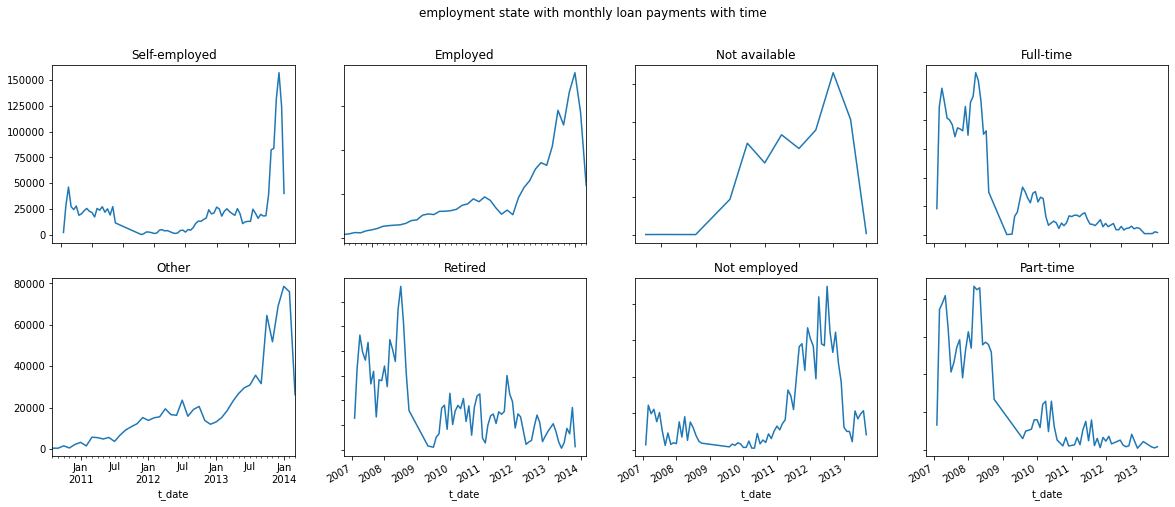

In [41]:
stat = df.EmploymentStatus.unique()
fig, ((ax1, ax2, ax3, ax4),(ax5, ax6,ax7, ax8))= plt.subplots(2, 4 , figsize=(20,8))
fig.suptitle('employment state with monthly loan payments with time')
filt2(df,stat[0]).plot(ax=ax1);
ax1.set_title(stat[0])
filt2(df,stat[1]).plot(ax=ax2);
ax2.set_title(stat[1])
filt2(df,stat[2]).plot(ax=ax3);
ax3.set_title(stat[2])
filt2(df,stat[3]).plot(ax=ax4);
ax4.set_title(stat[3])
filt2(df,stat[4]).plot(ax=ax5);
ax5.set_title(stat[4])
filt2(df,stat[8]).plot(ax=ax6);
ax6.set_title(stat[8])
filt2(df,stat[6]).plot(ax=ax7);
ax7.set_title(stat[6])
filt2(df,stat[7]).plot(ax=ax8);
ax8.set_title(stat[7])

for ax in fig.get_axes():
    ax.label_outer()

Similar behaviour was seen for each employment status regarding the monthly loan payments.

### Conclusions (Explanatory Data Analysis)

#### Univarat Explanatory Results

1. The analysis shows the bank is most likely to give loans at 36 month periods. The bank is expecting that for most of the loans will payoff with period of 36 months.
2. The loan status showing that the bank have current loan status more than others. the bank is not likely to cancel the loans. Most loans states are current and completed.
3. The most states having loans were CA, TX , NY, FL and others.
4. The analysis also shows that the Employees and full timers are the most section of the loans owners.
5. Home owners having loans are slightly more than those who don't. This introduces the hypothesis that people are having the loans to have their own homes at the percentage of 50%.
6. The people with income range of 25,000-49,999 dollars and 50,000-74,999 dollars are sectors who highly need loans.
7. The banks is more likely to verify the income at 92.4%. 

#### Bivariate Explanatory Results

1. The analysis shows that the employees are more likely to have homes while others like part timers and Not employed people a are more likely not to have homes.
2. Regarding the income ranges, for 25,000-49,999 dollars are not likely to have homes while others like 100,000+ dollars are more likely to have homes.
3. The Employees and full timers are have the greatest available Bank card credit.
4. the analysis shows that the loans amount is greater for the income range of 25,000-49,999 dollars.
5. More visualization were done to see the loan cash going out from the bank with time showing a great increase in the demand of loans at 2013 then decreased after 2014. similar behaviour are seen in the monthly income amount to the bank.

#### Multivariate  Explanatory Results

1. The multivariate analysis shows the loans given to different emplyment status showing who having peaks at different times.
2. Similar behaviour was seen for each employment status regarding the monthly loan payments.